/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


########################################
VERSION : 1.1 
 Interesting tools to be added to the workflow pipe!!!
########################################


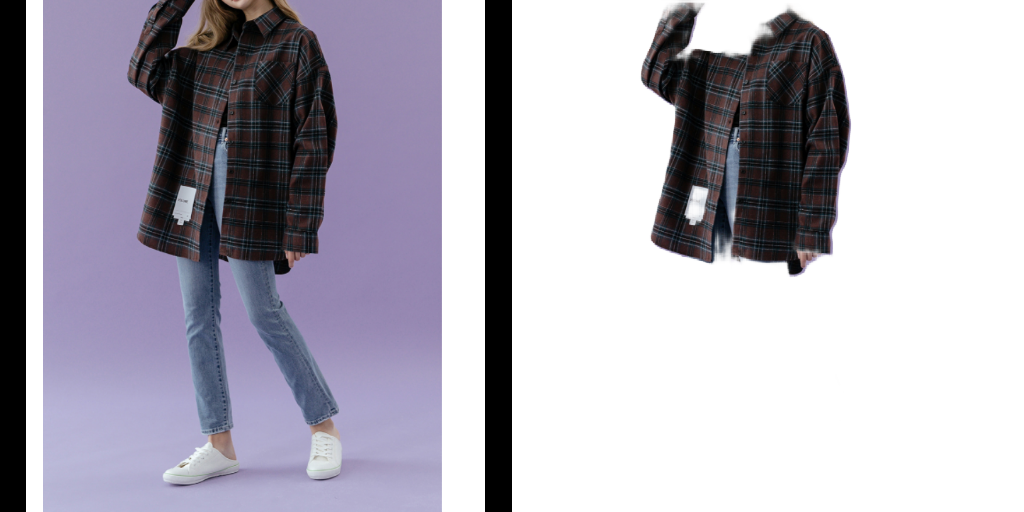

[[[0.00000000e+00 0.00000000e+00 0.00000000e+00 2.55000000e+02]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.55000000e+02]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.55000000e+02]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.61654614e-02]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.56190079e-02]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.92475492e-01]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 2.55000000e+02]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.55000000e+02]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.55000000e+02]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.50656919e-04]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.91068834e-04]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.38506284e-02]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 2.55000000e+02]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.55000000e+02]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.55000000e+02]
  ...
  [0.00000000e+00 

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
import sys
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from google.colab.patches import cv2_imshow

# GPU메모리 증가 허용하기 코드..내가 알아야할 필요가 있을지..? 뭔 이야기인지는 모르겠음.
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

# 이미지를 계속해서 바꿔바며 할수 있는 방법을 생각해야함 요기 f는 경로 입력.
f = '/content/y값사진1.png'
# 훈련된 모델 가지고 오는 경로 설정.
saved = load_model("/content/drive/My Drive/Colab Notebooks/데이터/topwears.h5")

class fashion_tools(object):
    def __init__(self,imageid,model,version=1.1):
        self.imageid = imageid
        self.model   = model
        self.version = version
        
    def get_dress(self,stack=False):
        """limited to top wear and full body dresses (wild and studio working)"""
        """takes input rgb----> return PNG"""
        name =  self.imageid
        file = cv2.imread(name)
        file = tf.image.resize_with_pad(file,target_height=512,target_width=512)
        rgb  = file.numpy()
        file = np.expand_dims(file,axis=0)/ 255.
        seq = self.model.predict(file)
        seq = seq[3][0,:,:,0]
        seq = np.expand_dims(seq,axis=-1)
        c1x = rgb*seq
        c2x = rgb*(1-seq)
        cfx = c1x+c2x
        dummy = np.ones((rgb.shape[0],rgb.shape[1],1))
        rgbx = np.concatenate((rgb,dummy*255),axis=-1)
        rgbs = np.concatenate((cfx,seq*255.),axis=-1)
        if stack:
            stacked = np.hstack((rgbx,rgbs))
            return stacked
        else:
            return rgbs
        

    def get_patch(self):
        return None

    def development(self):
        n_ = '\n'
        return (f"VERSION : {self.version} {n_} Interesting tools to be added to the workflow pipe!!!")

###running code

api    = fashion_tools(f,saved)
image_ = api.get_dress(True)

print("########################################")
print(api.development())
print("########################################")


# 파일로 저장해줌. 원본 이미지와, 추출된 이미지 나란히...
# cv2.imwrite("out.png",image_)
# 코랩환경해서 확인하려면... 밑의 코드로 터미널에서 확인가능
cv2_imshow(image_)
# 픽셀로 출력되는데 지수..?? 어떻게 변환하는지 알아봐야함.
print(image_)

# 텍스트 파일로 저장해줄수 있다는데 나는 안됨..? 오류 해결해 봐야한다.
# np.savetxt("pixel_data.txt", image_, fmt='%d', delimiter=" ")